<a href="https://colab.research.google.com/github/kahram-y/first-repository/blob/master/etc/regr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 1️⃣ 데이터 로드 및 전처리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [4]:
# 데이터 로드
df = pd.read_csv("train.csv")

# datetime 컬럼을 datetime형으로 변환
df['datetime'] = pd.to_datetime(df['datetime'])

# 시간, 요일, 월, 계절 등 파생변수 생성
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek  # 0=월요일, 6=일요일
df['month'] = df['datetime'].dt.month

# season, weather를 사람이 이해하기 쉬운 이름으로 매핑
season_map = {1: '봄', 2: '여름', 3: '가을', 4: '겨울'}
weather_map = {1: '맑음', 2: '흐림', 3: '가벼운 비/눈', 4: '심한 비/눈'}
df['season_name'] = df['season'].map(season_map)
df['weather_name'] = df['weather'].map(weather_map)

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,month,season_name,weather_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,봄,맑음
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,봄,맑음
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,봄,맑음
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,봄,맑음
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,봄,맑음


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

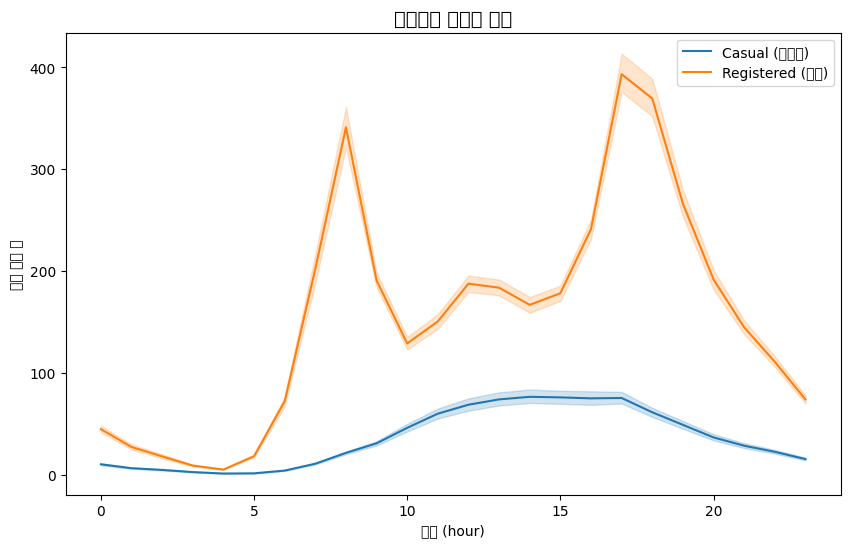

In [5]:
# 2️⃣ 시간대별 대여 패턴 비교
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='hour', y='casual', label='Casual (비회원)', estimator='mean')
sns.lineplot(data=df, x='hour', y='registered', label='Registered (회원)', estimator='mean')
plt.title("시간대별 대여량 비교", fontsize=14)
plt.xlabel("시간 (hour)")
plt.ylabel("평균 대여 수")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

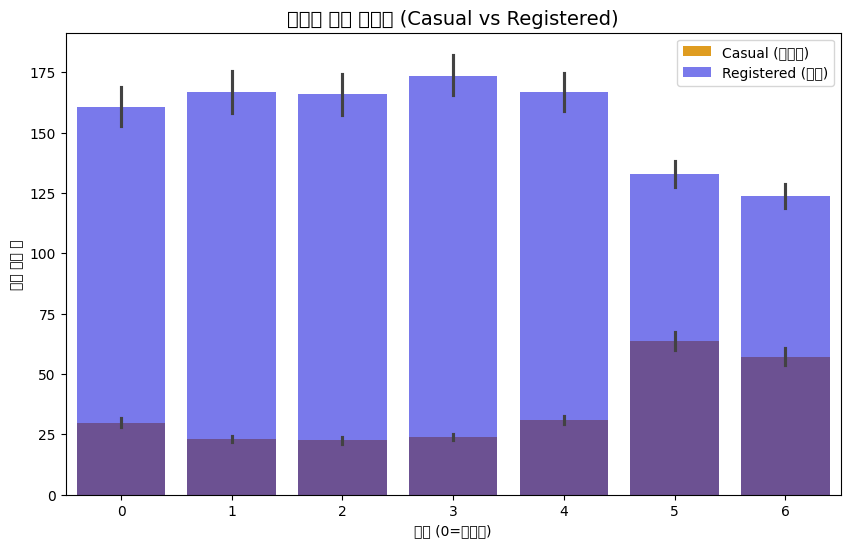

In [6]:
# 3️⃣ 요일별 대여량 비교
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='dayofweek', y='casual', label='Casual (비회원)', estimator='mean', color='orange')
sns.barplot(data=df, x='dayofweek', y='registered', label='Registered (회원)', estimator='mean', alpha=0.6, color='blue')
plt.title("요일별 평균 대여량 (Casual vs Registered)", fontsize=14)
plt.xlabel("요일 (0=월요일)")
plt.ylabel("평균 대여 수")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

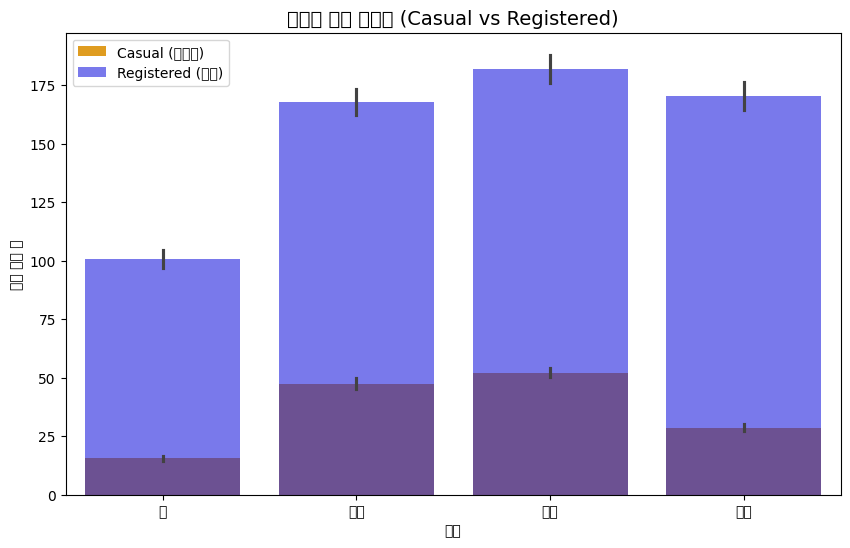

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

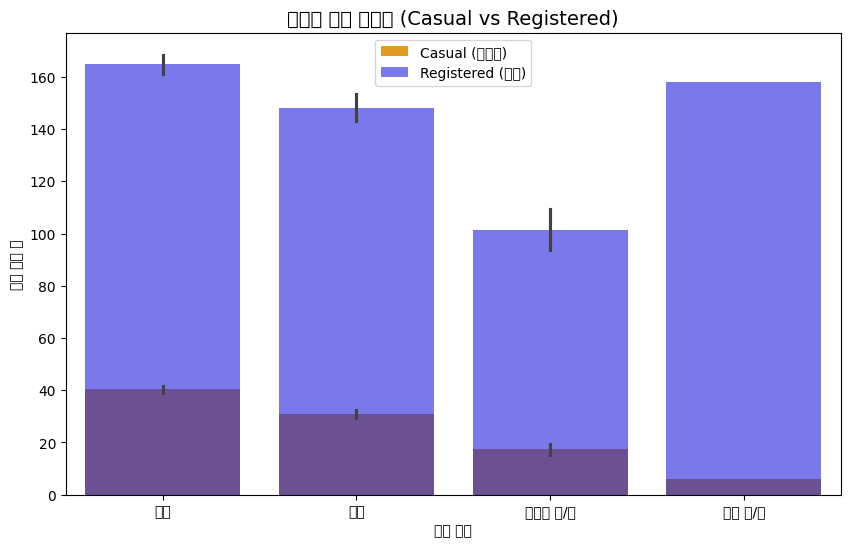

In [8]:
# 4️⃣ 계절 및 날씨별 대여량 비교
# (1) 계절별
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='season_name', y='casual', label='Casual (비회원)', estimator='mean', color='orange')
sns.barplot(data=df, x='season_name', y='registered', label='Registered (회원)', estimator='mean', alpha=0.6, color='blue')
plt.title("계절별 평균 대여량 (Casual vs Registered)", fontsize=14)
plt.xlabel("계절")
plt.ylabel("평균 대여 수")
plt.legend()
plt.show()

# (2) 날씨별
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='weather_name', y='casual', label='Casual (비회원)', estimator='mean', color='orange')
sns.barplot(data=df, x='weather_name', y='registered', label='Registered (회원)', estimator='mean', alpha=0.6, color='blue')
plt.title("날씨별 평균 대여량 (Casual vs Registered)", fontsize=14)
plt.xlabel("날씨 상태")
plt.ylabel("평균 대여 수")
plt.legend()
plt.show()

데이터 기반 가설 검증

-가설 H1: 자전거 대여 수요는 주중 출퇴근 시간대(8시, 18시) 에 가장 높을 것이다.

-가설 H2: 비 오는 날(또는 날씨가 나쁠 때) 자전거 대여량은 현저히 줄어든다.

-가설 H3: 비회원(casual) 사용자는 주말·맑은 날에 집중된다.

In [10]:
# 파생 변수 생성
df['is_weekend'] = df['dayofweek'].isin([5,6])  # 토/일요일 True

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

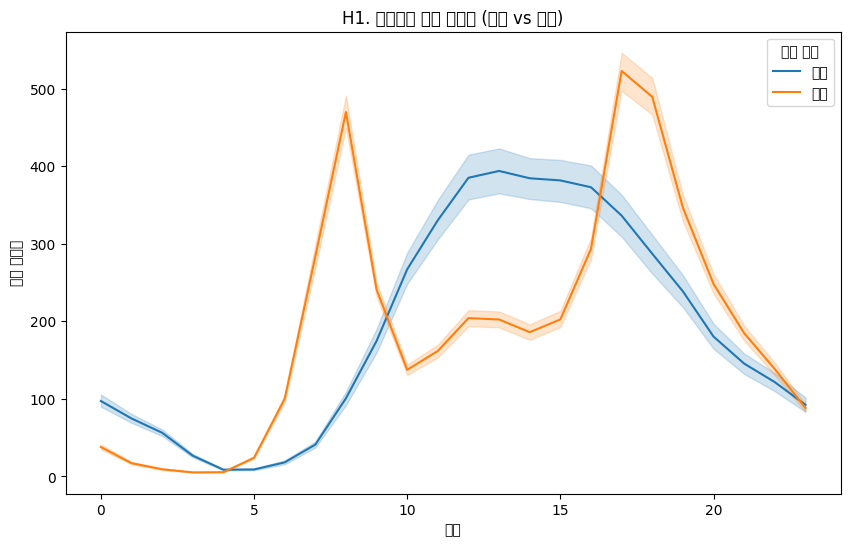

In [11]:
# H1. “자전거 대여 수요는 주중 출퇴근 시간에 가장 높을 것이다.”
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df, x='hour', y='count',
    hue=df['is_weekend'].map({True: '주말', False: '주중'}),
    estimator='mean'
)
plt.title("H1. 시간대별 평균 대여량 (주중 vs 주말)")
plt.xlabel("시간")
plt.ylabel("평균 대여량")
plt.legend(title="요일 구분")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50472 (\N{HANGUL SYLLABLE SSI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

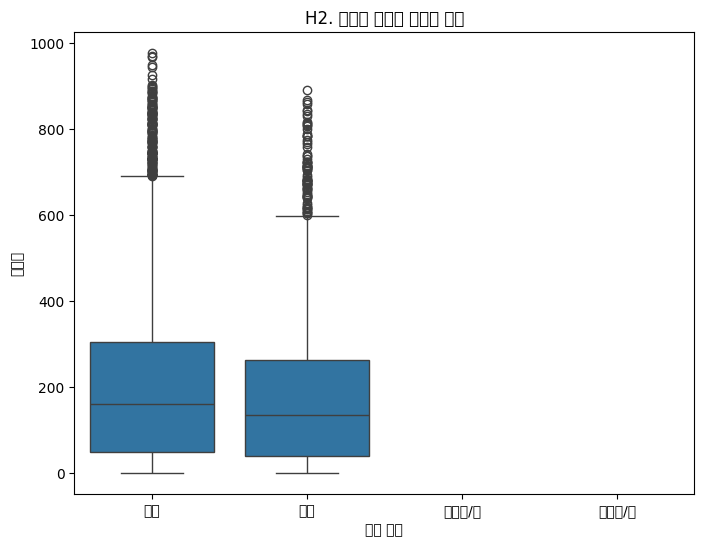

In [12]:
# H2. “비 오는 날에는 자전거 대여량이 현저히 줄어든다.”
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='weather_name', y='count', order=['맑음','흐림','약한비/눈','심한비/눈'])
plt.title("H2. 날씨별 자전거 대여량 분포")
plt.xlabel("날씨 상태")
plt.ylabel("대여량")
plt.show()

/tmp/ipython-input-2804112553.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.ca

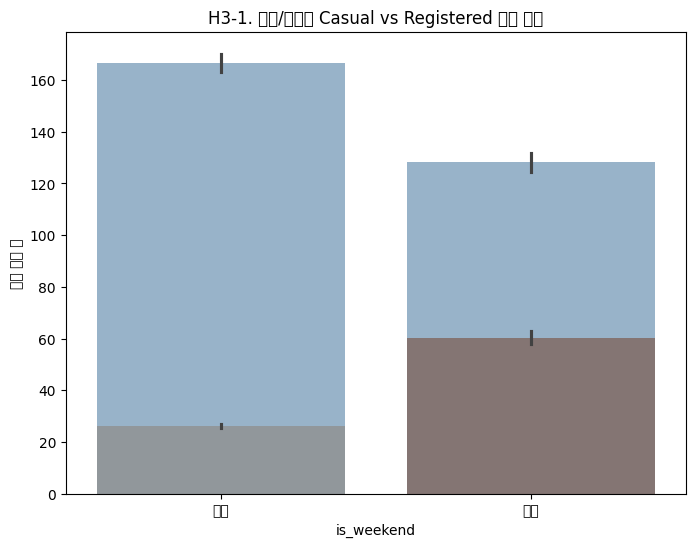

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

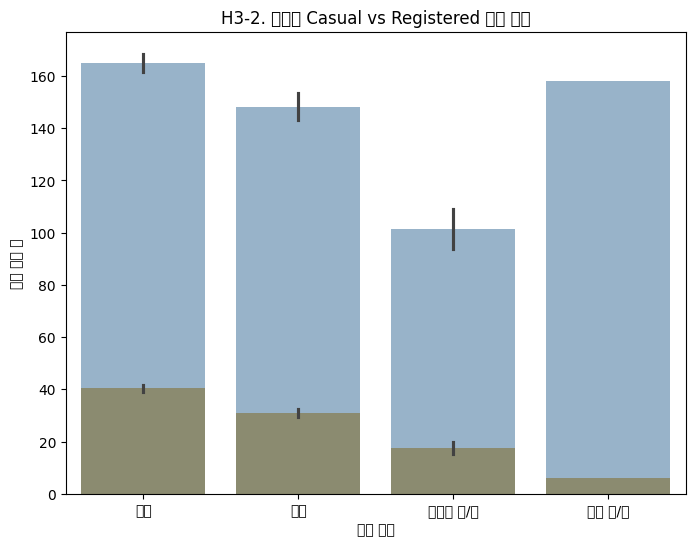

In [14]:
# H3. “비회원(casual)은 주말과 맑은 날에 집중된다.”
# (1) 주중/주말별 비회원-회원 비교
plt.figure(figsize=(8,6))
sns.barplot(
    data=df, x='is_weekend', y='casual',
    estimator='mean', palette='Oranges'
)
sns.barplot(
    data=df, x='is_weekend', y='registered',
    estimator='mean', color='steelblue', alpha=0.6
)
plt.xticks([0,1], ['주중','주말'])
plt.title("H3-1. 주중/주말별 Casual vs Registered 평균 대여")
plt.ylabel("평균 대여 수")
plt.show()

# (2) 날씨별 비회원-회원 비교
plt.figure(figsize=(8,6))
sns.barplot(
    data=df, x='weather_name', y='casual',
    estimator='mean', color='orange'
)
sns.barplot(
    data=df, x='weather_name', y='registered',
    estimator='mean', color='steelblue', alpha=0.6
)
plt.title("H3-2. 날씨별 Casual vs Registered 평균 대여")
plt.xlabel("날씨 상태")
plt.ylabel("평균 대여 수")
plt.show()